<div style="border: 1px solid black; padding: 10px;">
<table>
<tr>
    <td width=20%>
        <br/> <a style="font-size: 16px; font-weight: italic"> Data Scientist Junior </a> <br/> <br/> Théo JEAN <br/>
    </td>
    <td width=60%>
        <center>
            <h1>Bank attrition analysis</h1>
            <h2> <font color='red'> What type of customer is likely to change bank?</font> </h2>
        </center>
    </td>
    <td width=20%>
        <a style="font-size: 16px; font-weight: bold"> Personal project 1 </a>
         <br/> 07/04/2024 <br/>
    </td>
</tr>
</table>
</div>

https://www.kaggle.com/datasets/manjuahuja/bank-churner

# Objective : 

Maximise f1_score, we want to recognise as much as possible all the attrited customers

Développer une app streamlit permettant de fournir des caractéristiques de clients et qui offre des analyses statistiques dessus + la prédiction d'attrition. 

En termes de contenu :
- Statistiques descriptives
- Modélisation et optimisation avec GridSearch + Optuna
- OOP pour l'EDA et pipeline
- Comparaison avec du DL
- Une map folium
- Affichage des résultats en dynamique comme sur Optuna pour l'entrainement

A faire : 
- Quid de la corrélation ?
- Amélio modèle

# First overview of the dataset :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimpy import skim
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [126]:
df = pd.read_csv("BankChurners.csv", sep=",")

In [127]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [128]:
df = df.iloc[:, 1:-2] # deletion of last two columns not required for analysis and the first

In [129]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### **DESCRIPTION DES VARIABLES :**

**CLIENTNUM** : Quantitative, identifiant du client 

**Attribution_Flag** : Qualitative, toujours client ou pas

**Customer_Age** : Quantitative, age du client

**Gender** : Qualitative, sexe du client

**Dependent_count** : Quantitative, nombre de compte du client

**Education_level** : Qualitative, niveau d'éducation du client

**Marital_Status** : Qualitative, situation amoureuse du client

**Income_category** : Qualitative, tranche de revenue du client

**Card_Category** : Qualitative, type de carte de crédit du client

**Months_on_book** : Quantitative, période en mois où le client est avec cette banque

**Total_Relationship_Count** : Quantitative, nombre total de produits détenus par le client

**Months_Inactive_12_mon** : Quantitative, Nombre de mois inactifs au cours des 12 derniers mois

**Contacts_Count_12_mon** : Quantitative, Nombre de contacts avec la banque au cours des 12 derniers mois

**Credit_Limit** : Quantitative, plafond bancaire du client

**Total_Revolving_Bal** : Quantitative, Total du crédit renouvelable actuel

**Avg_Open_To_Buy**: Quantitative, Moyenne sur les 12 derniers mois du montant qu'il restait à dépenser en fin de mois

**Total_Amt_Chng_Q4_Q1** : Quantitative, Variation du montant des transactions (T4 par rapport au T1)

**Total_Trans_Amt** : Quantitative, Montant total des transactions (12 derniers mois)

**Total_Trans_Ct** : Quantitative, Nombre total de transactions (12 derniers mois)

**Total_Ct_Chng_Q4_Q1** : Quantitative, Variation du nombre d’opérations (T4 par rapport au T1)

**Avg_Utilization_Ratio** : Quantitative, Taux moyen d'utilisation des cartes

In [130]:
convert_col = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' ]

for col in convert_col:
    df[col] = df[col].astype('category')

In [131]:
skim(df)
print('This dataframe contains', len(df), 'obs and', len(df.columns), 'columns')

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 10127  │ │ int64       │ 9     │ │ Attrition_Flag        │                                │
│ │ Number of columns │ 20     │ │ category    │ 6     │ │ Gender                │                                │
│ └───────────────────┴────────┘ │ float64     │ 5     │ │ Education_Level       │                                │
│                                └─────────────┴───────┘ │ Marital_Status        │                                │
│                                                        │ Income_Category       │                                │
│                                                        │ Card_Category         │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean  ┃ sd    ┃ p0    ┃ p25    ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Customer_Age             │   0 │     0 │    46 │     8 │    26 │     41 │    46 │     52 │     73 │ ▁▅▇▆▂  │  │
│ │ Dependent_count          │   0 │     0 │   2.3 │   1.3 │     0 │      1 │     2 │      3 │      5 │ ▃▅▇▇▅▁ │  │
│ │ Months_on_book           │   0 │     0 │    36 │     8 │    13 │     31 │    36 │     40 │     56 │ ▁▂▃▇▃▁ │  │
│ │ Total_Relationship_Count │   0 │     0 │   3.8 │   1.6 │     1 │      3 │     4 │      5 │      6 │ ▃▅▇▇▇▆ │  │
│ │ Months_Inactive_12_mon   │   0 │     0 │   2.3 │     1 │     0 │      2 │     2 │      3 │      6 │  ▅▇▇▁▁ │  │
│ │ Contacts_Count_12_mon    │   0 │     0 │   2.5 │   1.1 │     0 │      2 │     2 │      3 │      6 │ ▁▃▇▇▃▁ │  │
│ │ Credit_Limit             │   0 │     0 │  8600 │  9100 │  1400 │   2600 │  4500 │  11000 │  35000 │ ▇▂▁▁ ▁ │  │
│ │ Total_Revolving_Bal      │   0 │     0 │  1200 │   810 │     0 │    360 │  1300 │   1800 │   2500 │ ▇▂▅▇▅▅ │  │
│ │ Avg_Open_To_Buy          │   0 │     0 │  7500 │  9100 │     3 │   1300 │  3500 │   9900 │  35000 │ ▇▂▁▁ ▁ │  │
│ │ Total_Amt_Chng_Q4_Q1     │   0 │     0 │  0.76 │  0.22 │     0 │   0.63 │  0.74 │   0.86 │    3.4 │   ▁▇   │  │
│ │ Total_Trans_Amt          │   0 │     0 │  4400 │  3400 │   510 │   2200 │  3900 │   4700 │  18000 │ ▇▇▁ ▁  │  │
│ │ Total_Trans_Ct           │   0 │     0 │    65 │    23 │    10 │     45 │    67 │     81 │    140 │ ▂▆▇▇▂▁ │  │
│ │ Total_Ct_Chng_Q4_Q1      │   0 │     0 │  0.71 │  0.24 │     0 │   0.58 │   0.7 │   0.82 │    3.7 │   ▃▇   │  │
│ │ Avg_Utilization_Ratio    │   0 │     0 │  0.27 │  0.28 │     0 │  0.023 │  0.18 │    0.5 │      1 │ ▇▂▂▂▂▁ │  │
│ └──────────────────────────┴─────┴───────┴───────┴───────┴───────┴────────┴───────┴────────┴────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                             ┃ NA       ┃ NA %         ┃ ordered             ┃ unique           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇

This dataframe contains 10127 obs and 20 columns


Target value : **Attrition_Flag**

**RESUME STATISTIQUES DESCRIPTIVES / PROFIL DES CLIENTS DE LA BANQUE :**

Profil démographique : 
- La majorité des clients ont un âge compris entre 41 et 52 ans, avec une médiane de 46 ans.
- La plupart des clients ont entre 1 et 3 personnes à charge, avec une médiane de 2.3.
- En moyenne, les clients sont clients depuis 36 mois, avec la plupart des clients ayant entre 31 et 40 mois d'ancienneté.

Engagement et relation avec la banque :

- Les clients détiennent en moyenne 3.8 produits bancaires.
- En moyenne, les clients ont été inactifs pendant 2.3 mois au cours des 12 derniers mois.
- Les clients ont eu en moyenne 2.5 contacts avec la banque au cours des 12 derniers mois.

Santé financière :

- La limite de crédit à la consommation en moyenne des clients se situe autour de 8600, avec une variation significative.
- La plupart des clients ont un solde renouvelable entre 360 et 1800.
- En moyenne, les clients ont un montant ouvert à l'achat entre 1300 et 9900.

Comportement financier :

- Le changement total du montant au cours du quatrième trimestre par rapport au premier trimestre est en moyenne de 0.76.
- La plupart des clients ont un montant total de transaction entre 2200 et 4700.
- En moyenne, les clients ont entre 45 et 81 transactions.

In [132]:
df.duplicated().any() # any duplicated obs verification 

False

In [133]:
# Let's check for missing hidden values in categorical variables

for col in df.select_dtypes(include='category').columns:
    print(f'{col.ljust(30, "-")} : {df[col].unique()}')

Attrition_Flag---------------- : ['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']
Gender------------------------ : ['M', 'F']
Categories (2, object): ['F', 'M']
Education_Level--------------- : ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status---------------- : ['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category--------------- : ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category----------------- : ['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']


We can see that in `Education_Level`, `Marital_Status` and `Income_Category` there are Unknown values

In [134]:
unknown_col = ['Education_Level', 'Marital_Status', 'Income_Category']

for col in unknown_col:
    print(f"{col} : {len(df[df[col] == 'Unknown'])}")
    print(round((df[col] == 'Unknown').mean() * 100, 2),'%')
    print('-----')

Education_Level : 1519
15.0 %
-----
Marital_Status : 749
7.4 %
-----
Income_Category : 1112
10.98 %
-----


# 1. Exploratory Data Analysis (EDA)

## 1.1. Variables qualitatives:

In [137]:
string_columns = df.select_dtypes(include=['category'])

for i in string_columns.columns:
    print(f"Décompte des valeurs pour la colonne '{i}':")
    print(string_columns[i].value_counts().to_string(), end="\n\n")

Décompte des valeurs pour la colonne 'Attrition_Flag':
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627

Décompte des valeurs pour la colonne 'Gender':
Gender
F    5358
M    4769

Décompte des valeurs pour la colonne 'Education_Level':
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451

Décompte des valeurs pour la colonne 'Marital_Status':
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748

Décompte des valeurs pour la colonne 'Income_Category':
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727

Décompte des valeurs pour la colonne 'Card_Category':
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20



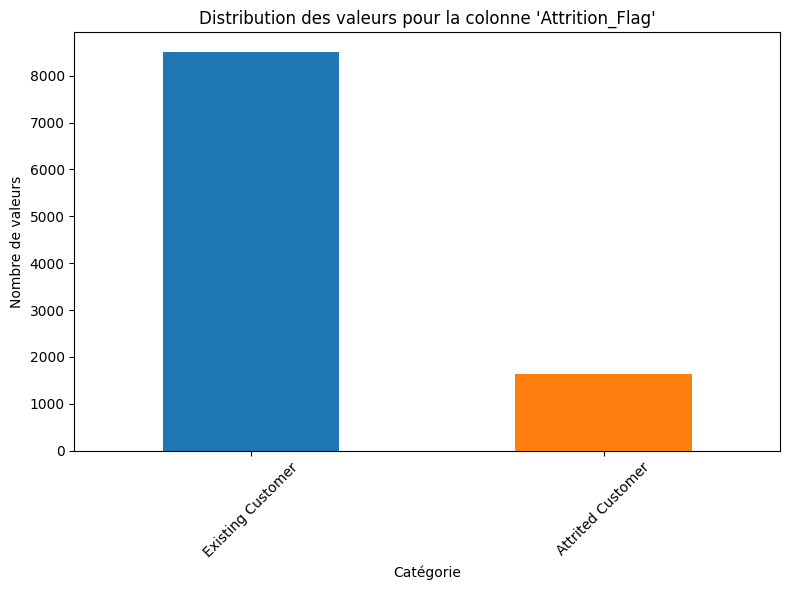

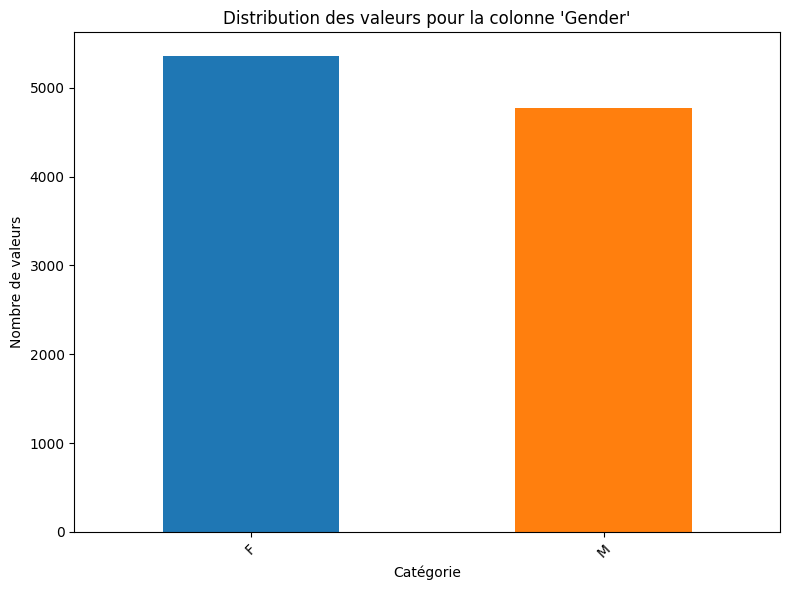

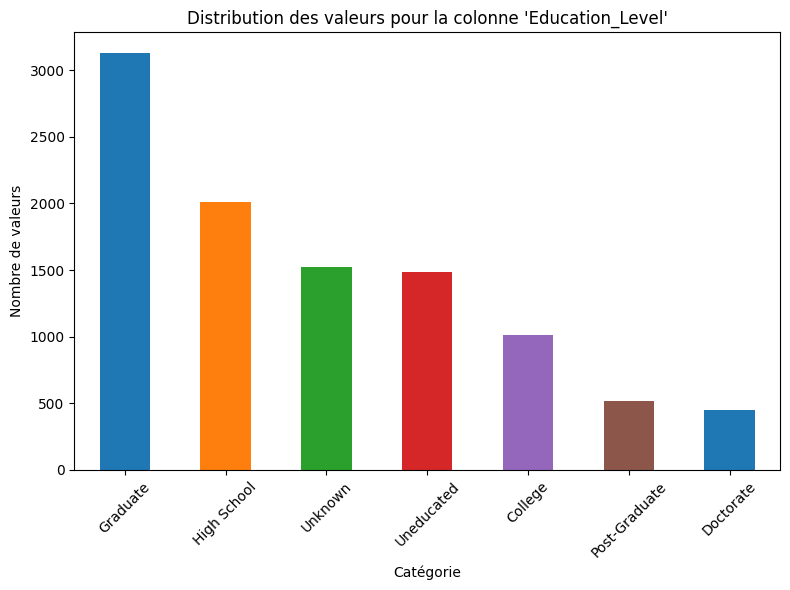

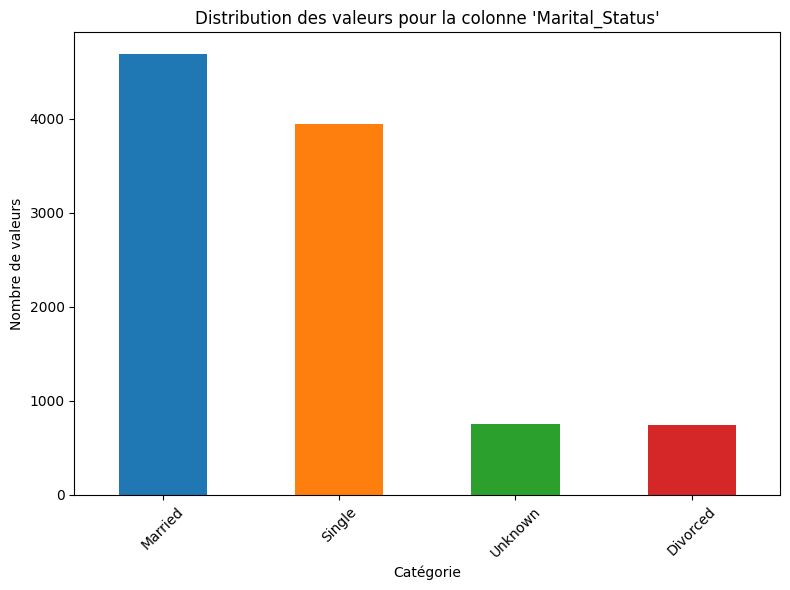

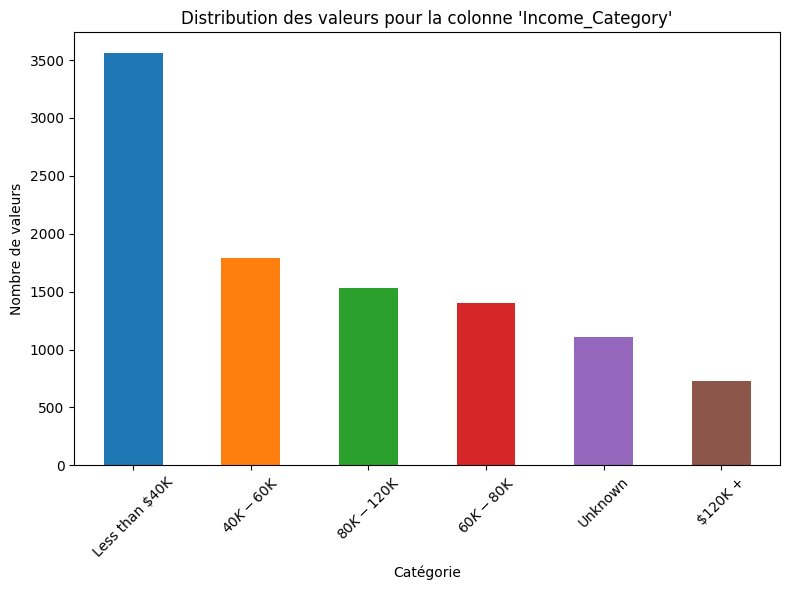

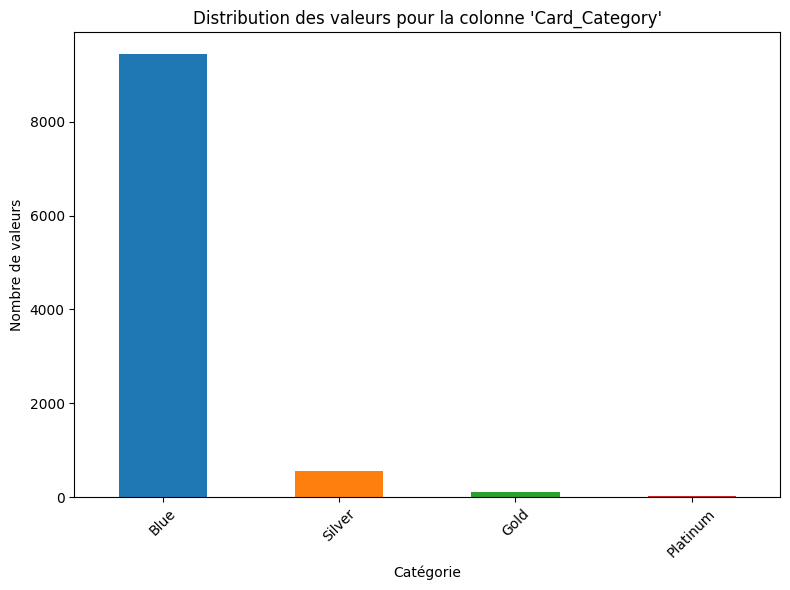

In [18]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Itération sur les colonnes de type string et affichage des graphiques
for col in string_columns.columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color=custom_colors)
    plt.title(f"Distribution des valeurs pour la colonne '{col}'")
    plt.xlabel('Catégorie')
    plt.ylabel('Nombre de valeurs')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 1.2. Variables quantitatives :

In [19]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

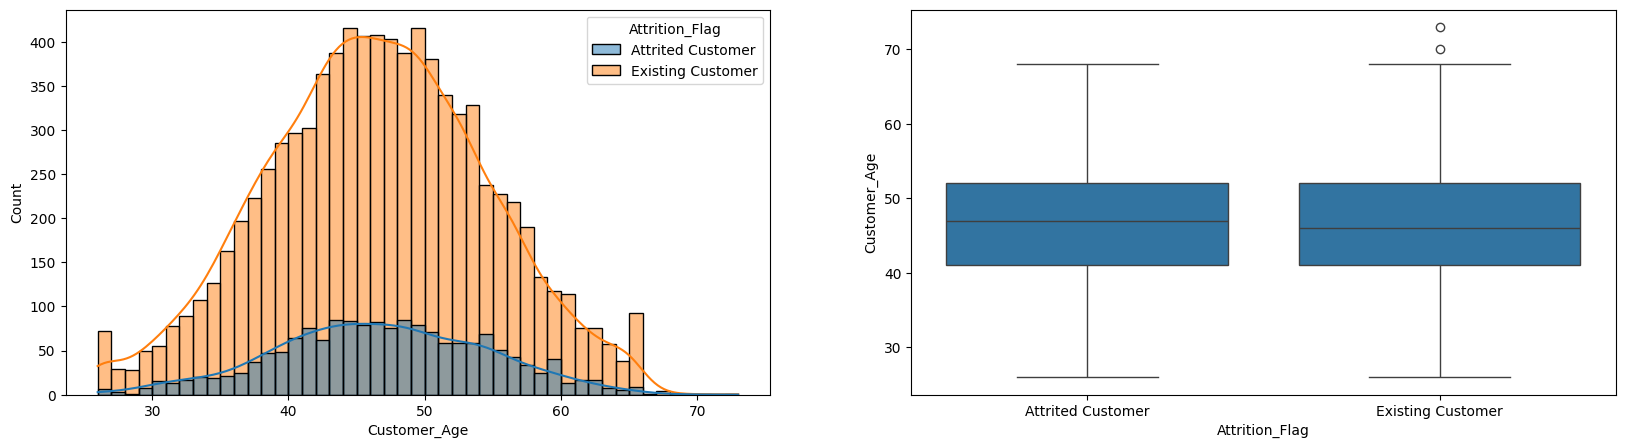

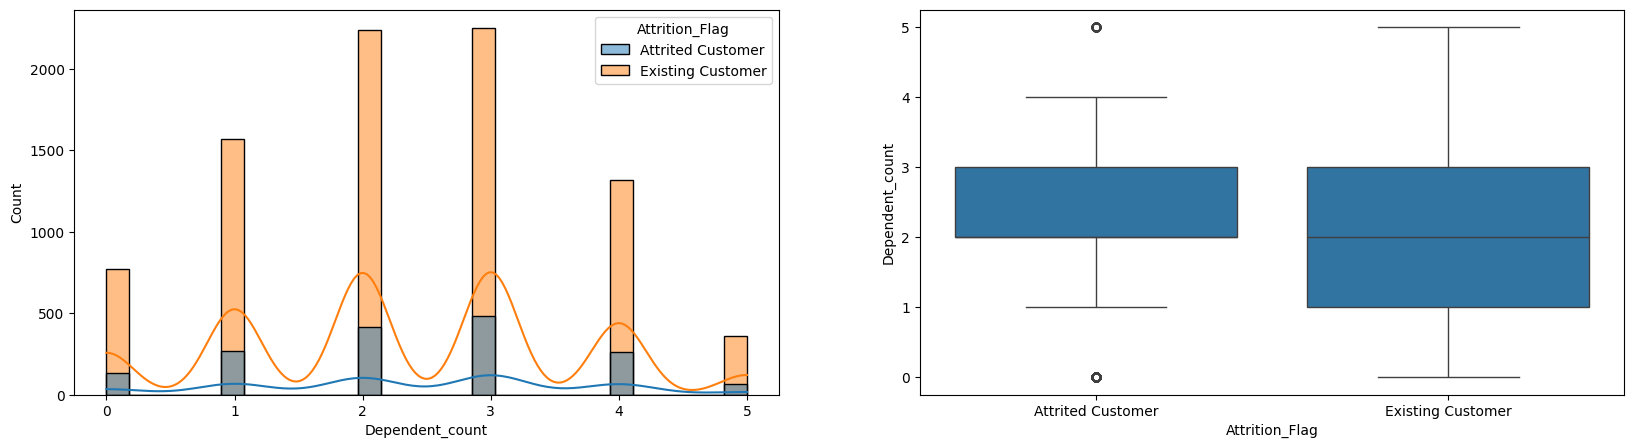

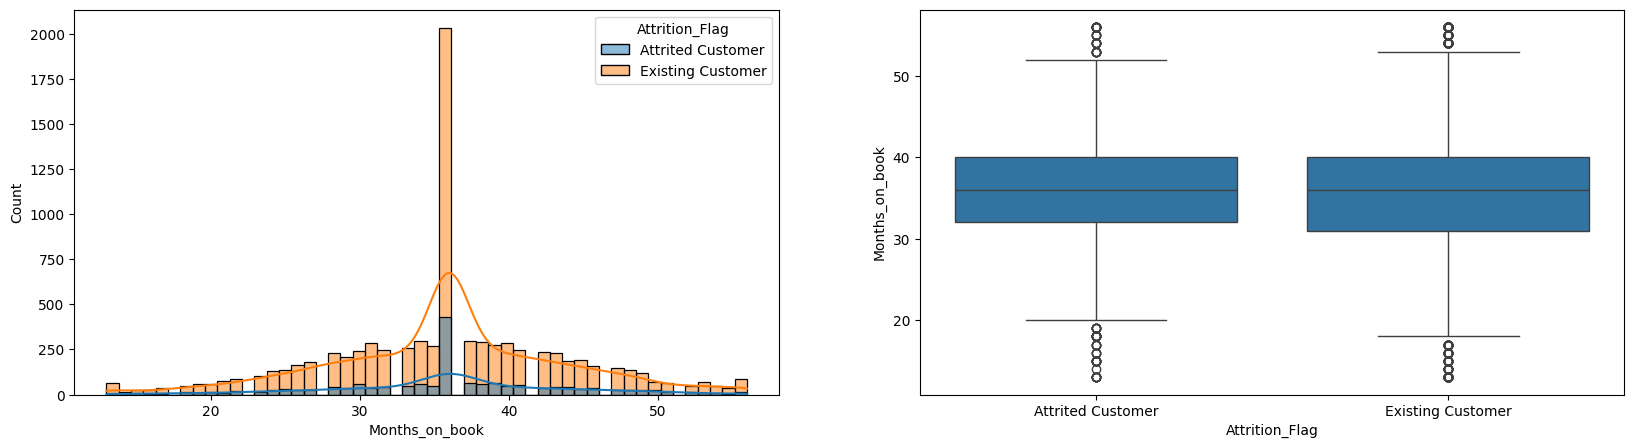

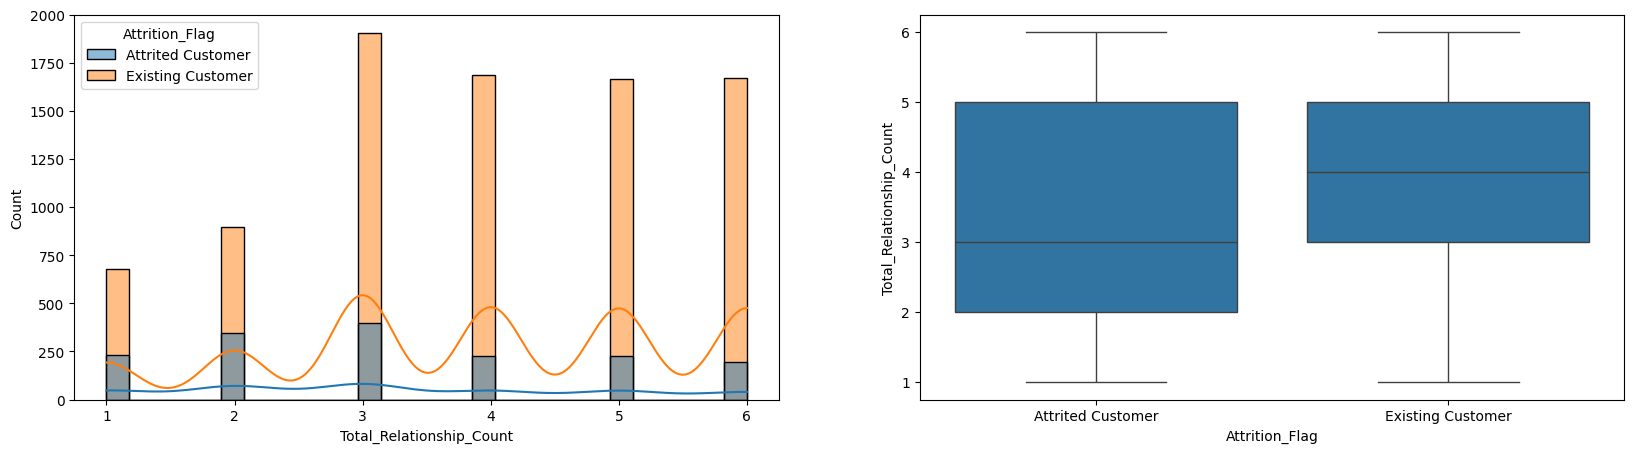

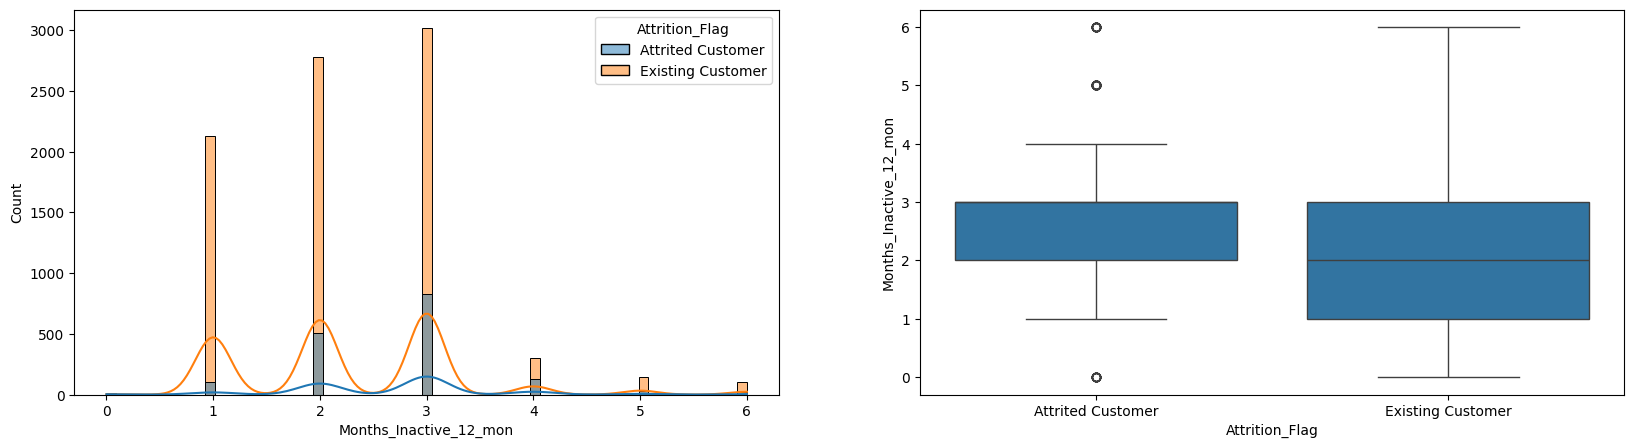

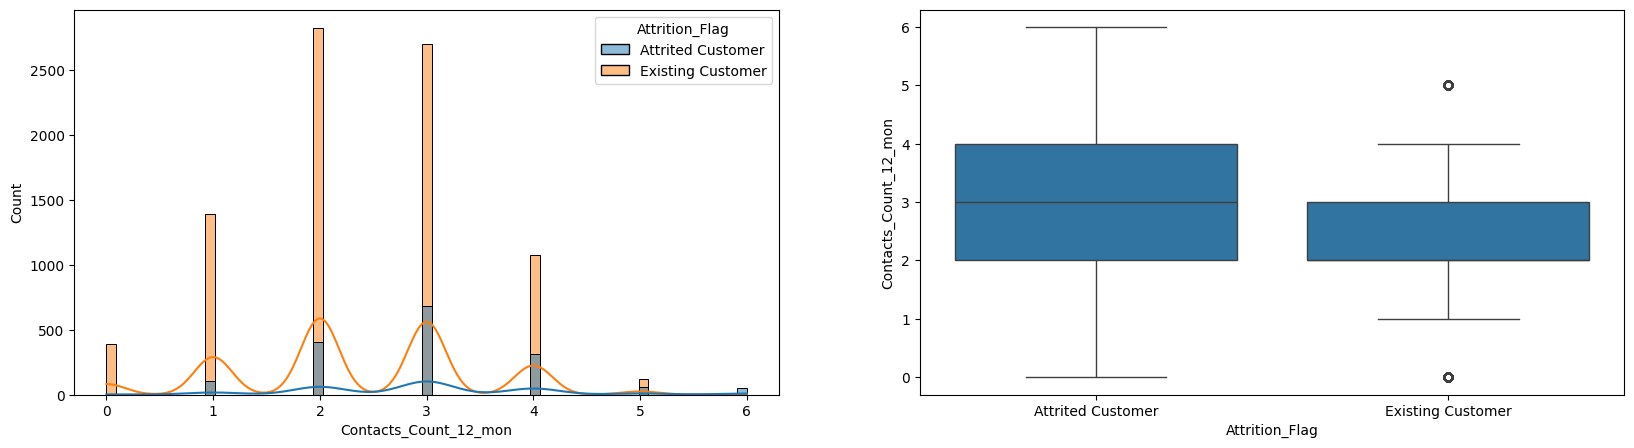

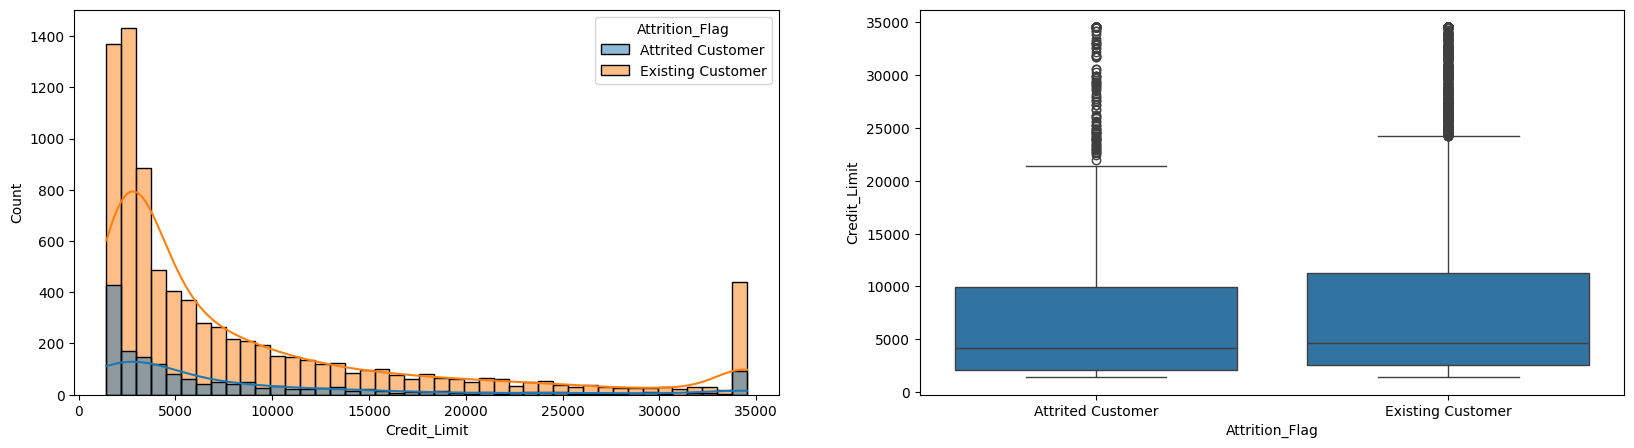

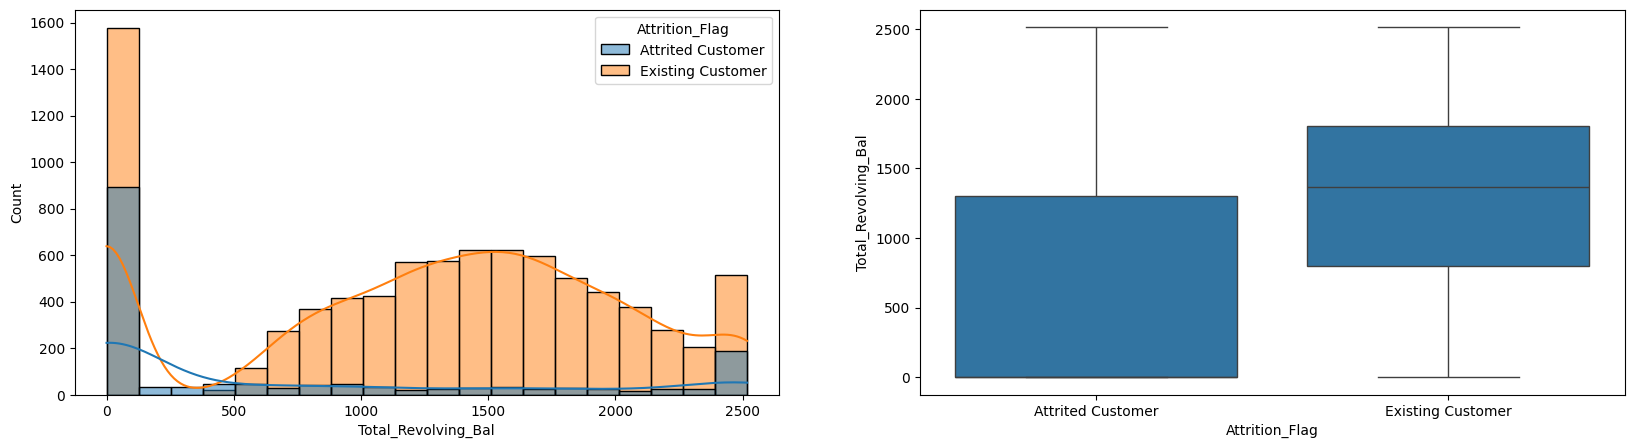

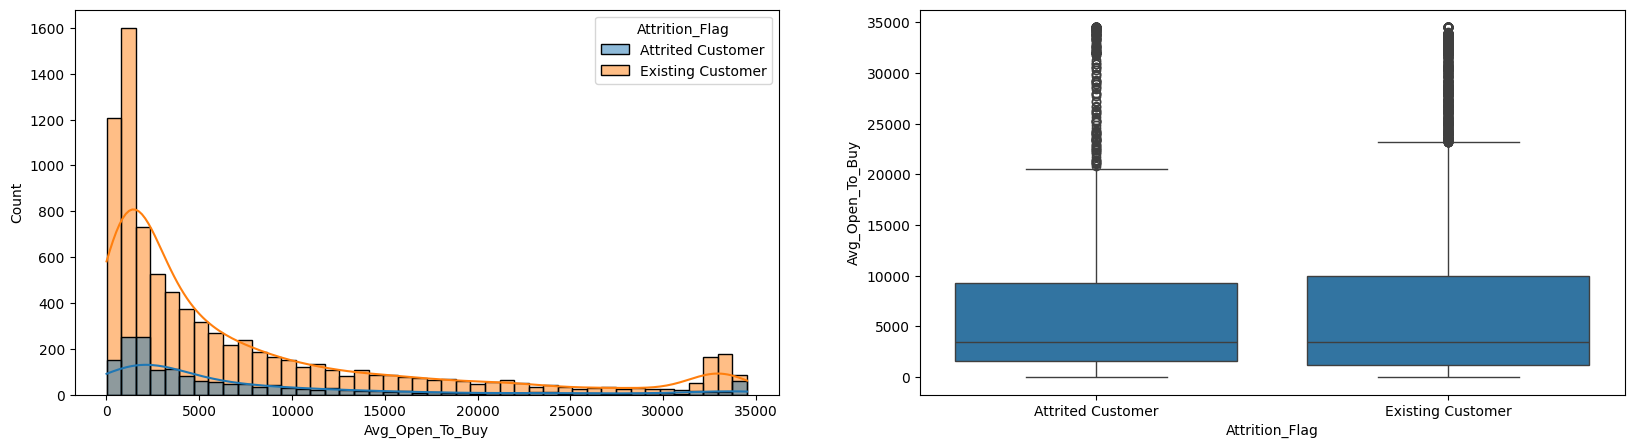

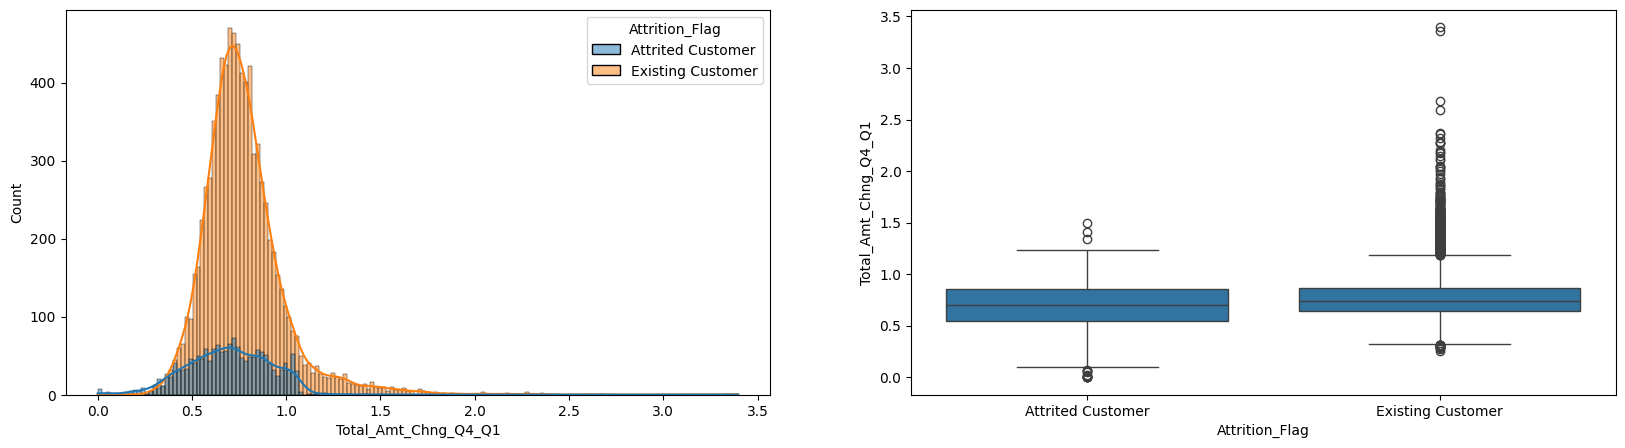

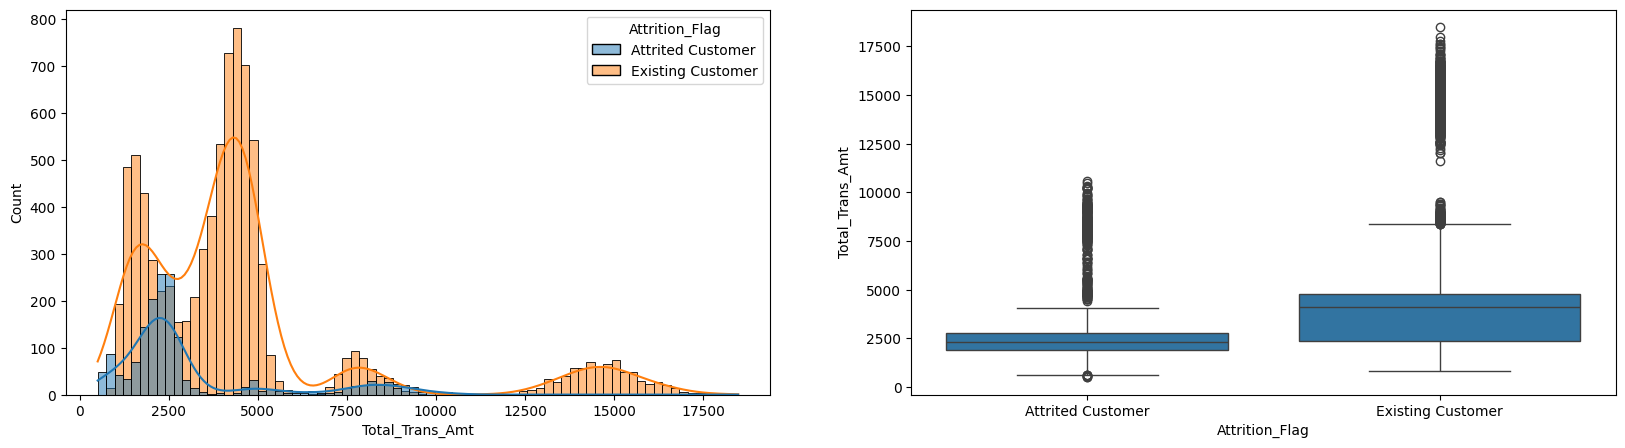

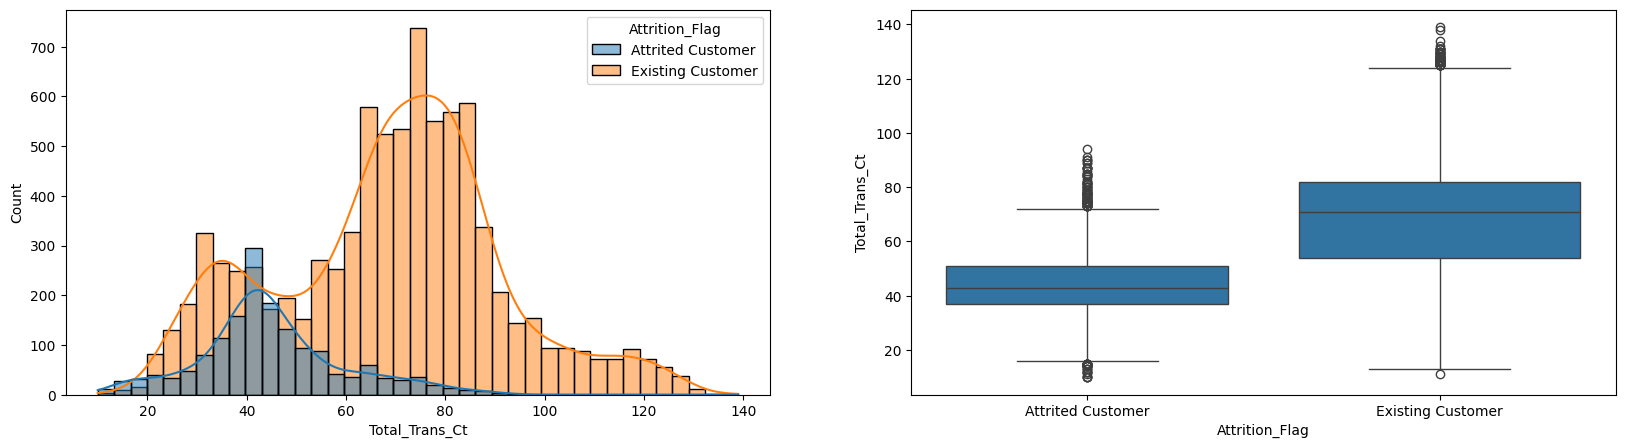

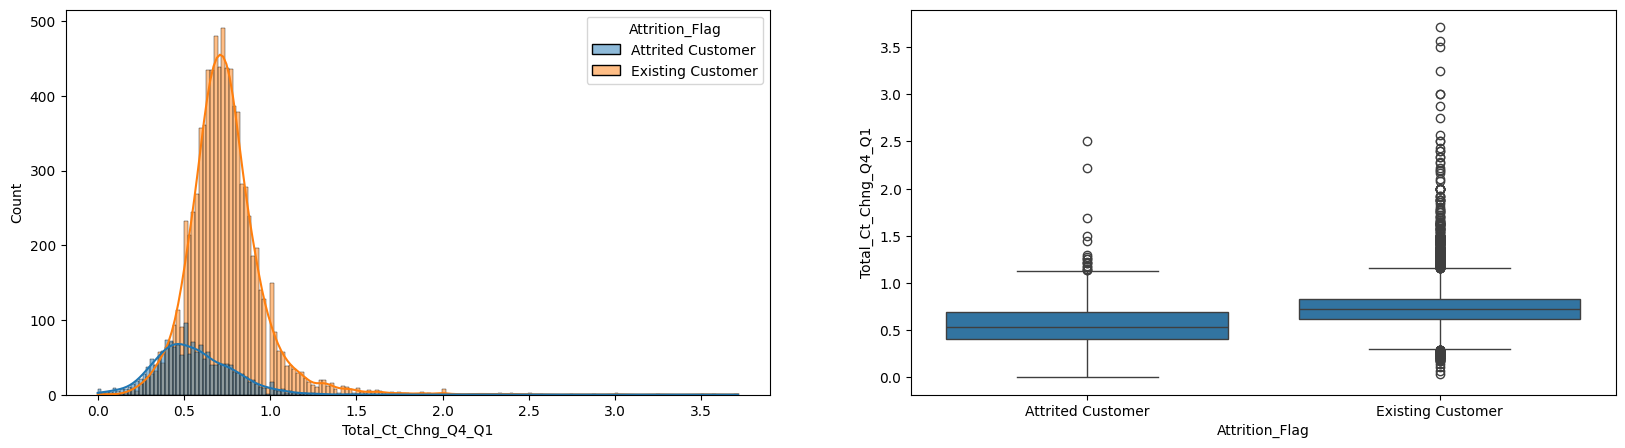

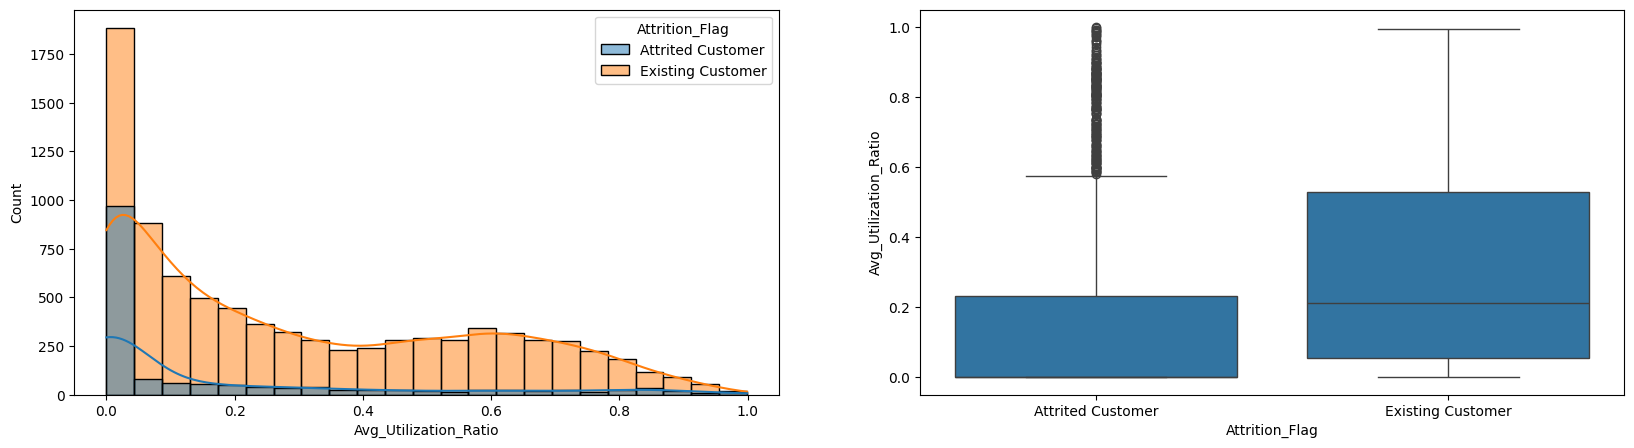

In [20]:
def plot_box(var):
    plt.subplot(1, 2, 1)  # Met le graphique à gauche de l'écran
    sns.histplot(data=df, x=var, hue='Attrition_Flag', kde=True)  # kde=True permet de mettre la densité
    
    plt.subplot(1, 2, 2)  # Met le graphique à droite de l'écran
    sns.boxplot(x='Attrition_Flag', y=var, data=df)
    
    plt.show()

for col in numeric_columns.columns:
    plt.figure(figsize=(20, 5))
    plot_box(col)

**Total_Revolving_Bal, Total_Trans_Ct et Avg_Utilization_Ratio semble être des variables intéressantes dans l'analyse de l'attrition**

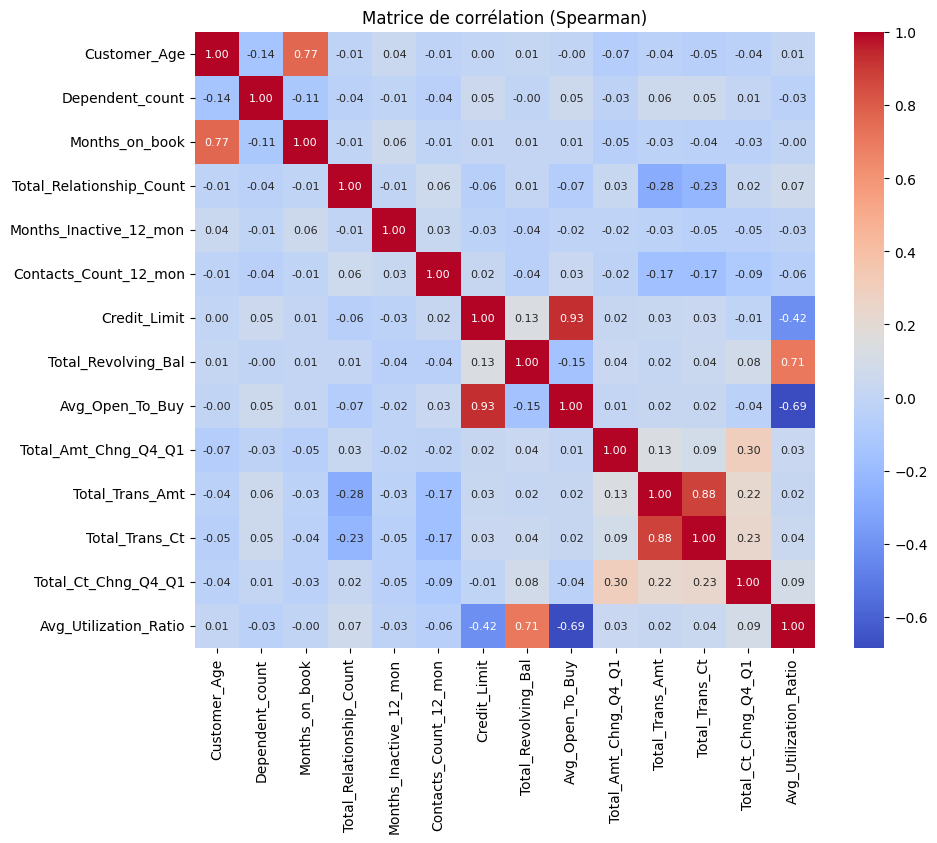

In [21]:
corr_matrix = numeric_columns.corr(method='spearman') # Pourquoi utiliser Spearman ?

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matrice de corrélation (Spearman)')
plt.show()

Grâce à cette représentation graphique on voit que certaines variables semblent corrélées entre elles :
* ***Month_on_book*** et ***Customer_Age*** => 0.77
* ***Total_Trans_Ct*** et ***Total_Trans_Amt*** => 0.88
* ***Total_Revolving_Bal*** et ***Avg_utilzation_Ratio*** => 0.71
* ***Avg_Open_To_Buy*** et ***Credit_Limit*** => 0.93

Les boxplot entre Avg_Open_To_Buy et Credit_Limit ne varient pas en fonction de l'attrition ou non, donc on peut supprimer une des deux. On supprime Total_Trans_Ct car la variable Avg_Utilization_Ration correspond déjà à un critère de nombre de transaction

In [12]:
#df.drop(columns=['Total_Trans_Ct', 'Avg_Open_To_Buy', 'Total_Revolving_Bal'], inplace=True)

In [138]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

In [139]:
df.select_dtypes(include=['int64', 'float64'])

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


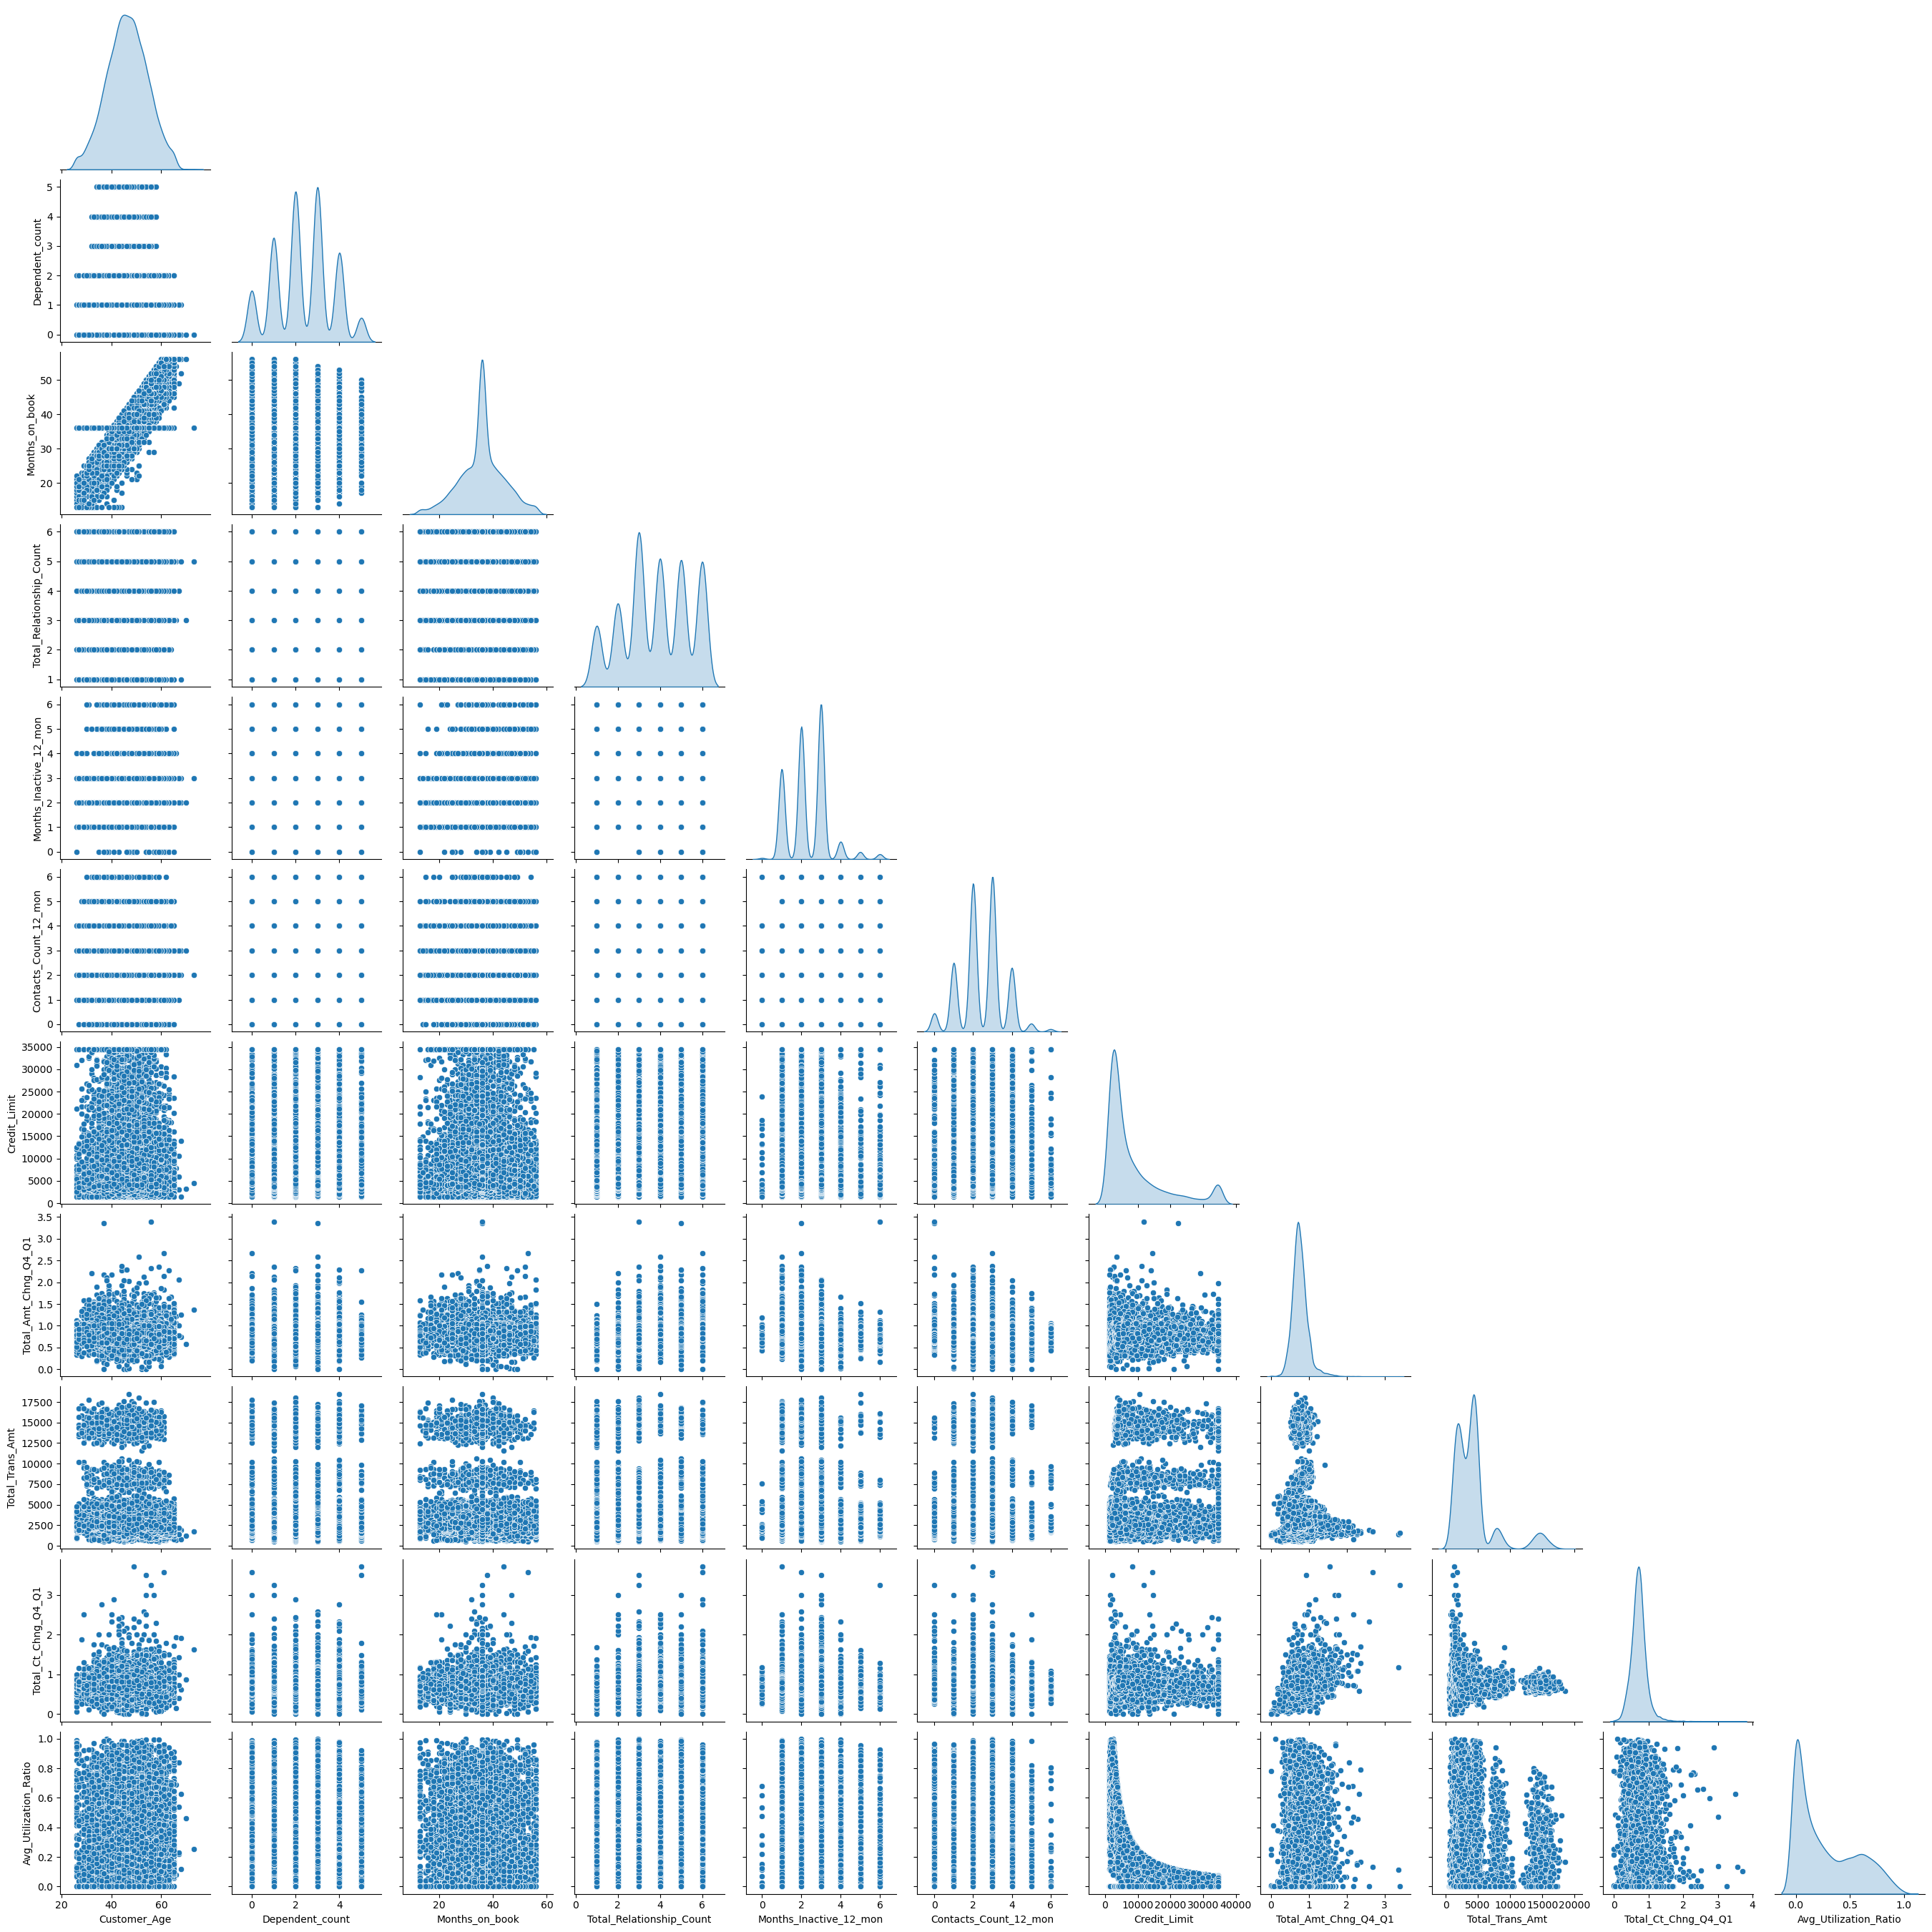

In [19]:
sns.pairplot(numeric_columns, corner=True, diag_kind="kde")

On observe une relation linéaire entre `Month_On_Book` et `Customer_Age`. On verra plus tard si on supprimer une des deux variables

# 3. Preprocessing 

IterativeImputer pour le traitement des valeurs manquantes ?
Garder seulement AVG utilisation ratio ?
Outiliers ?

https://www.kaggle.com/code/rebeccapringle/bank-churners-96-6-accuracy

In [140]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [141]:
X = df.drop(columns=['Attrition_Flag'])  
y = df['Attrition_Flag']  

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 19), (2026, 19), (8101,), (2026,))

## 3.1. Pipeline creation

In [72]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1.335,1144,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1.541,1291,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,2.594,1887,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1.405,1171,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,2.175,816,2.500,0.000


In [144]:
numeric_features = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

#label_features = ["Education_Level", "Income_Category"]
#categorical_features = [col for col in categorical_features if col not in label_features]

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def preprocessing(X_train, X_test, var_to_trans, cat_columns):

    cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    numeric_tranformer = Pipeline(steps=[
        #('robust scaler', RobustScaler())
        ('minmax', MinMaxScaler())
        #('Standard scaler', StandardScaler()),
        #('log', LogTransformer())
        #('power', PowerTransformer())
        #('YJ', PowerTransformer(method='yeo-johnson'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('RobScal', numeric_tranformer, var_to_trans),
            ('OHE', cat_transformer, cat_columns)
        ],
        remainder='passthrough'
    )

    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_trans = pipeline.fit_transform(X_train)
    X_test_trans = pipeline.transform(X_test)

    features_names = preprocessor.get_feature_names_out()

    return X_train_trans, X_test_trans, features_names

In [146]:
X_train_trans, X_test_trans, col_names = preprocessing(X_train, X_test, numeric_features, categorical_features)

In [147]:
col_names

array(['RobScal__Customer_Age', 'RobScal__Dependent_count',
       'RobScal__Months_on_book', 'RobScal__Total_Relationship_Count',
       'RobScal__Months_Inactive_12_mon',
       'RobScal__Contacts_Count_12_mon', 'RobScal__Credit_Limit',
       'RobScal__Total_Revolving_Bal', 'RobScal__Avg_Open_To_Buy',
       'RobScal__Total_Amt_Chng_Q4_Q1', 'RobScal__Total_Trans_Amt',
       'RobScal__Total_Trans_Ct', 'RobScal__Total_Ct_Chng_Q4_Q1',
       'RobScal__Avg_Utilization_Ratio', 'OHE__Gender_F', 'OHE__Gender_M',
       'OHE__Education_Level_College', 'OHE__Education_Level_Doctorate',
       'OHE__Education_Level_Graduate',
       'OHE__Education_Level_High School',
       'OHE__Education_Level_Post-Graduate',
       'OHE__Education_Level_Uneducated', 'OHE__Education_Level_Unknown',
       'OHE__Marital_Status_Divorced', 'OHE__Marital_Status_Married',
       'OHE__Marital_Status_Single', 'OHE__Marital_Status_Unknown',
       'OHE__Income_Category_$120K +', 'OHE__Income_Category_$40K - $60K

In [148]:
# Création des dataframe intermédiaires pour avoir les colonnes transformées
X_train_trans_df = pd.DataFrame(X_train_trans, columns=col_names)
X_test_trans_df = pd.DataFrame(X_test_trans, columns=col_names)

In [149]:
y_train = y_train.map({'Attrited Customer': 1, 'Existing Customer': 0})
y_test = y_test.map({'Attrited Customer': 1, 'Existing Customer': 0})

# Test de plusieurs modèles :

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, auc, accuracy_score, make_scorer, precision_score

In [80]:
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', xgb.XGBClassifier())
]

je teste plusieurs modèles différents de cette manière et j'aimerai afficher par ailleurs un  graphique qui me récapitule les scores obtenues pendant l'entraiment dans les différents cross-validation avec des boxplots

In [81]:
for model_name, model in models:
    print(f"Training {model_name}...")
    model.fit(X_train_trans, y_train)
    y_pred = model.predict(X_test_trans)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------")

Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1699
           1       0.90      0.61      0.73       327

    accuracy                           0.93      2026
   macro avg       0.91      0.80      0.84      2026
weighted avg       0.92      0.93      0.92      2026

----------------------------------------
Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1699
           1       0.79      0.31      0.45       327

    accuracy                           0.88      2026
   macro avg       0.84      0.65      0.69      2026
weighted avg       0.87      0.88      0.85      2026

----------------------------------------
Training K-Nearest Neighbors...
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-s

Les arbres de décision et XGBoost semblent des bonnes pistes de modèles a tester pour ce jeu de données

# Procédure d'évaluation

In [82]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

In [151]:
def evaluation(model):
    
    model.fit(X_train_trans, y_train) 
    y_pred = model.predict(X_test_trans)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    
    N, train_score, val_score = learning_curve(model, X_train_trans, y_train,
                                              cv=skf, scoring='precision',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [152]:
model_1 = xgb.XGBClassifier(random_state=0)

[[1663   36]
 [  42  285]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.89      0.87      0.88       327

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



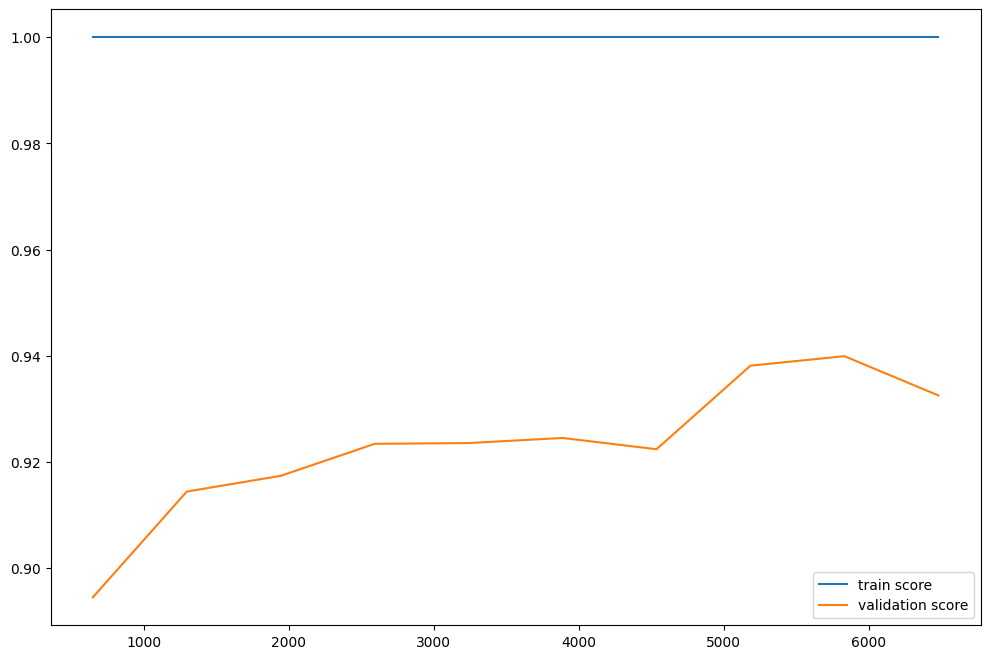

In [153]:
evaluation(model_1)

Dans une learning curve, l'ensemble d'apprentissage est progressivement augmenté à chaque itération pour évaluer l'impact de la taille de l'ensemble d'apprentissage sur la performance du modèle. Chaque point de la learning curve correspond à la moyenne des scores des 4 folds

Interprétations

- Amélioration de la généralisation : L'augmentation du score de validation indique que le modèle généralise de mieux en mieux à mesure que plus de données sont utilisées pour l'entraînement. Cela signifie que le modèle apprend efficacement des données et améliore sa capacité à prédire des résultats sur des données non vues.
- Réduction de l'overfitting : Une courbe de validation qui augmente peut aussi indiquer que l'impact de l'overfitting diminue. Au début, avec peu de données, le modèle pourrait trop s'adapter à ces données limitées, menant à de mauvaises performances sur l'ensemble de validation. À mesure que plus de données sont introduites, le modèle devient moins susceptible de s'adapter aux bruits ou aux anomalies spécifiques de l'ensemble d'apprentissage.


Actions Potentielles
- Continuer d'ajouter des données : Si le score continue d'augmenter avec plus de données, cela peut suggérer que continuer à augmenter la taille de l'ensemble d'apprentissage serait bénéfique. Cela peut être particulièrement vrai pour des modèles complexes ou des problèmes où la capture de toutes les variabilités nécessite de grandes quantités de données.
- Examiner le besoin de régularisation : Si la courbe de validation continue de monter sans signe de plateau, il se peut que le modèle bénéficierait de moins de régularisation. Cependant, si vous observez un plateau, il peut être temps d'examiner d'autres formes de régularisation ou d'ajuster les paramètres du modèle pour voir si la performance peut être encore améliorée.
- Évaluer l'équilibre entre les performances d'entraînement et de validation : Bien que l'amélioration des performances de validation soit un bon signe, il est également crucial de surveiller la courbe d'entraînement pour s'assurer qu'elle reste raisonnablement proche de la courbe de validation. Un écart trop important pourrait encore indiquer un surapprentissage.
- Optimisation des hyperparamètres : L'utilisation de techniques comme la recherche sur grille ou la recherche aléatoire pour affiner les hyperparamètres peut aider à maximiser les performances à mesure que vous ajoutez plus de données. Cela pourrait impliquer d'ajuster des paramètres tels que le taux d'apprentissage, le nombre d'estimateurs dans les modèles ensemblistes, ou la profondeur des arbres.

<Axes: >

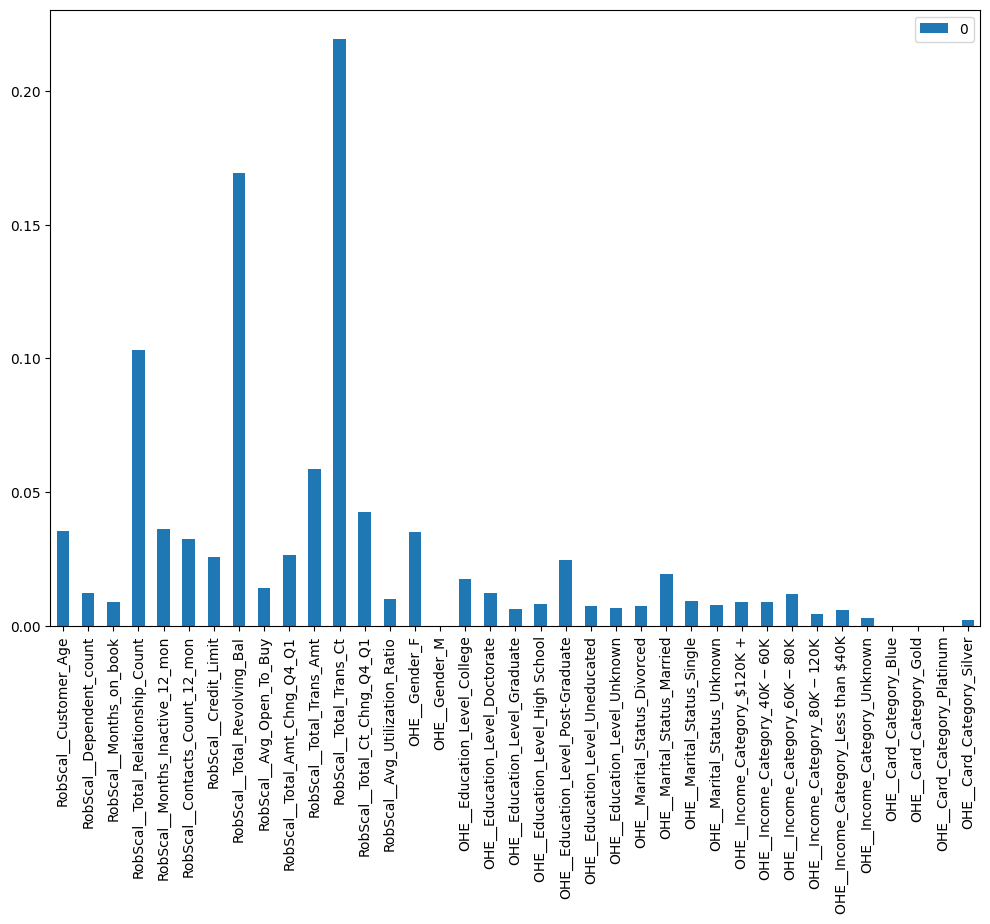

In [154]:
pd.DataFrame(model_1.feature_importances_, index=X_train_trans_df.columns).plot.bar(figsize=(12, 8))

In [155]:
model_2 = RandomForestClassifier(random_state=0)

[[1677   22]
 [  83  244]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1699
           1       0.92      0.75      0.82       327

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026



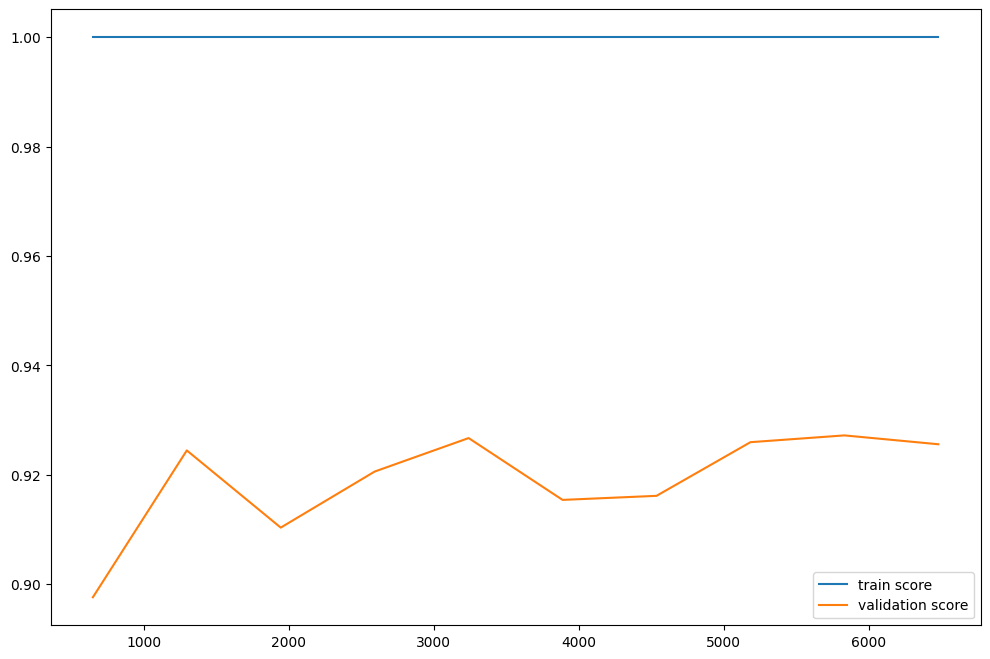

In [156]:
evaluation(model_2)

<Axes: >

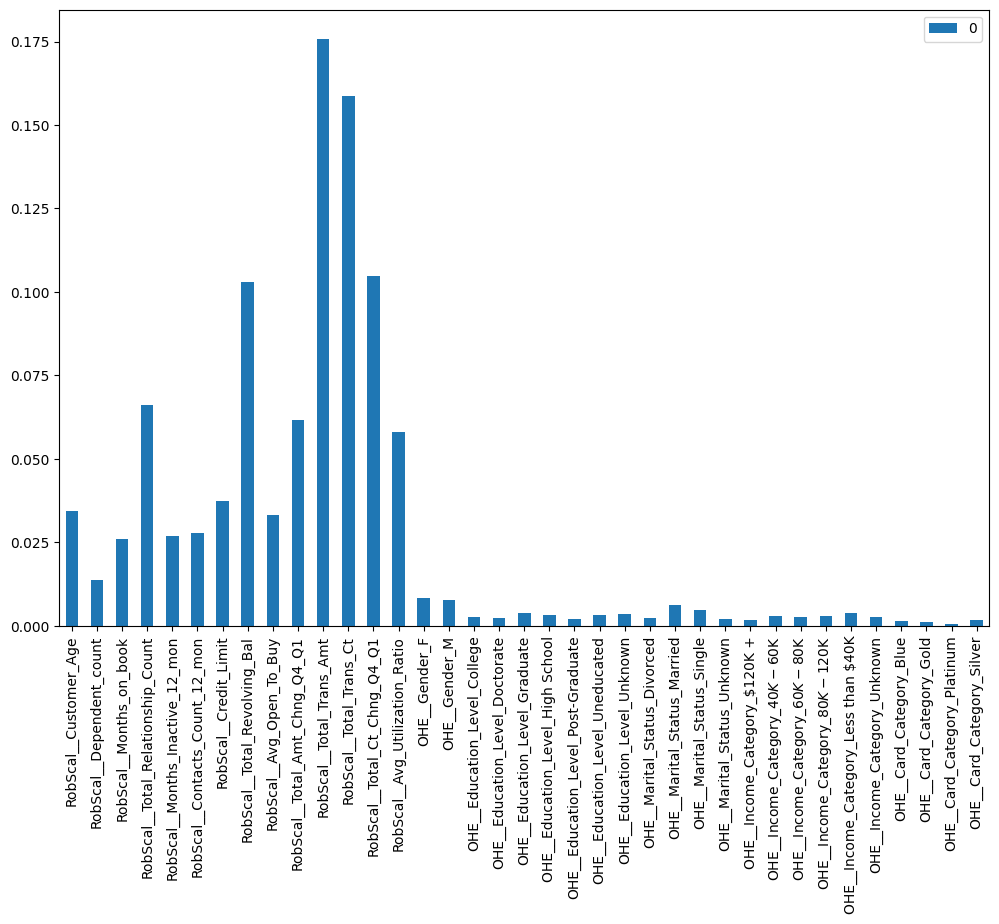

In [157]:
pd.DataFrame(model_2.feature_importances_, index=X_train_trans_df.columns).plot.bar(figsize=(12, 8))

Total_Relationship_Count et Total_Trans_Amt semblent faire partie des variables les plus décisives

In [159]:
from sklearn.feature_selection import SelectKBest, f_classif

model_3 = make_pipeline(#PolynomialFeatures(2), 
                        SelectKBest(f_classif, k=10),
                        xgb.XGBClassifier(random_state=0))

In [160]:
selector = SelectKBest(f_classif, k=10)  
selector.fit_transform(X_train_trans, y_train) # sur X_train_trans car on veut connait les meilleures var sur les données transformées
np.array(X_train_trans_df.columns)[selector.get_support()] # sur X_train_num qui comporte les colonnes associées à X_train_trans

array(['RobScal__Total_Relationship_Count',
       'RobScal__Months_Inactive_12_mon',
       'RobScal__Contacts_Count_12_mon', 'RobScal__Total_Revolving_Bal',
       'RobScal__Total_Amt_Chng_Q4_Q1', 'RobScal__Total_Trans_Amt',
       'RobScal__Total_Trans_Ct', 'RobScal__Total_Ct_Chng_Q4_Q1',
       'RobScal__Avg_Utilization_Ratio', 'OHE__Gender_M'], dtype=object)

[[1662   37]
 [  44  283]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1699
           1       0.88      0.87      0.87       327

    accuracy                           0.96      2026
   macro avg       0.93      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



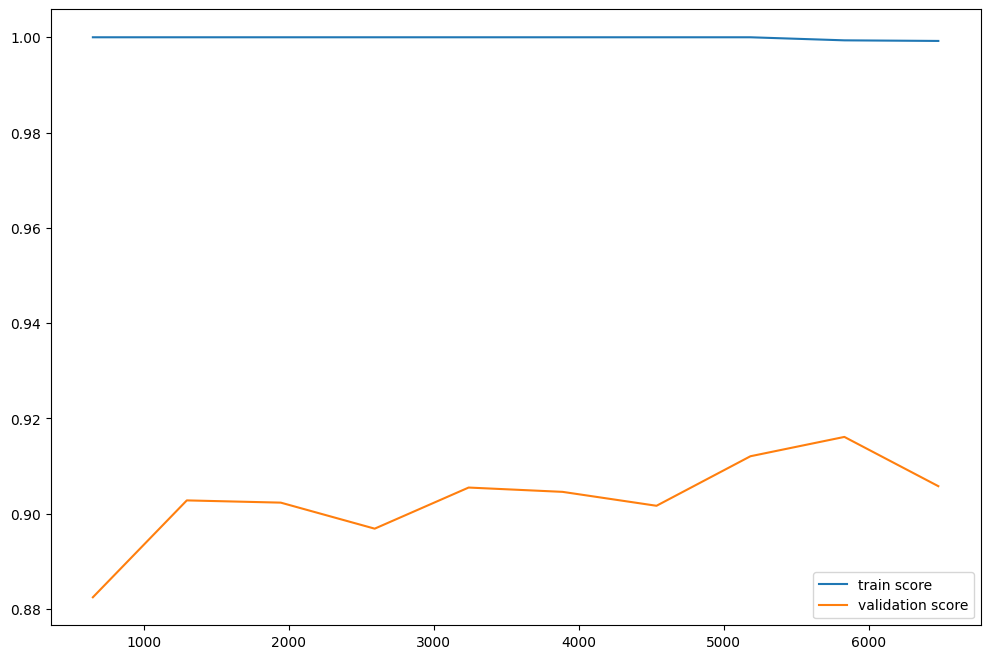

In [161]:
evaluation(model_3)

In [162]:
from sklearn.preprocessing import PolynomialFeatures

model_4 = make_pipeline(PolynomialFeatures(2), 
                        #SelectKBest(f_classif, k=15),
                        xgb.XGBClassifier(random_state=0))

[[1670   29]
 [  42  285]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.91      0.87      0.89       327

    accuracy                           0.96      2026
   macro avg       0.94      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



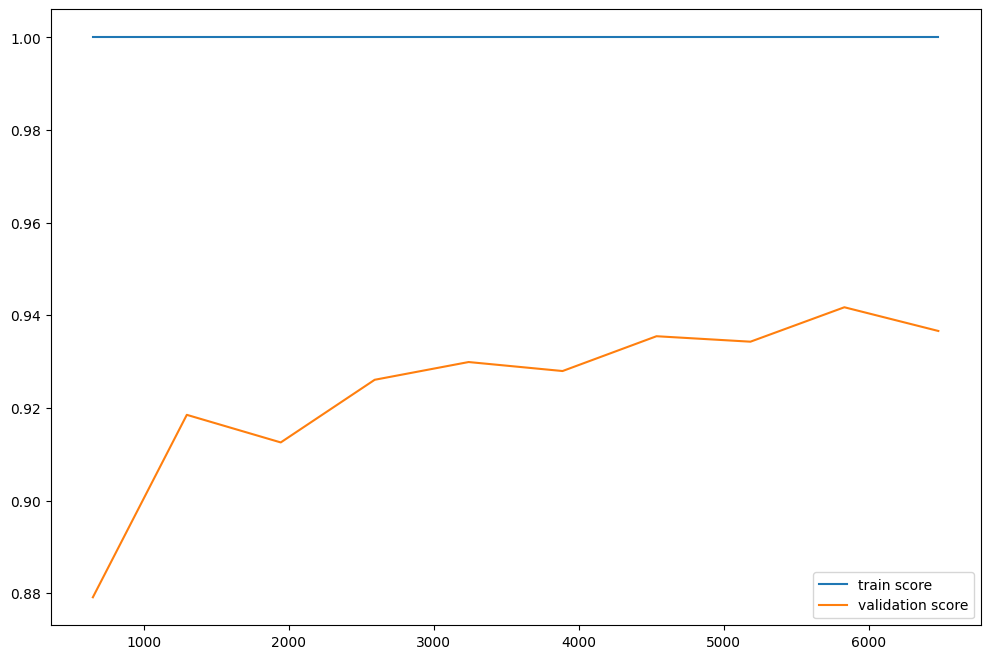

In [163]:
evaluation(model_4)

# Amélioration du modèle XGBClassifier

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [121]:
param_grid = {
    'selectkbest__k': [10, 12, 15],
    'xgbclassifier__n_estimators': [100, 200, 300, 400],
    'xgbclassifier__max_depth': [3, 5, 7, 9],
    'xgbclassifier__learning_rate': [0.1, 0.01, 0.001],
    'xgbclassifier__min_child_weight': [1, 3, 5, 7]
}

In [122]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search = GridSearchCV(model_3, param_grid, cv=skf, scoring='f1')
grid_search.fit(X_train_trans, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=15)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=0, ...))]),
             param_grid={'selectkbest__k': [10, 12, 15],
                         'xgbclassifier__learning_rate': [0.1, 0.01, 0.001],
                         'xgbclassifier__max_depth': [3, 5, 7, 9],
                         'xgbclassifier__min_child_weight': [1, 3, 5, 7],
                         'xgbclassifier__n_estimators': [100, 200, 300, 400]},
             scoring='f1')

In [123]:
print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)
print("Score de validation croisée (F1 score):", grid_search.best_score_)

Meilleurs paramètres trouvés:
{'selectkbest__k': 15, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 400}
Score de validation croisée (F1 score): 0.8771253059550643


In [124]:
test_score = grid_search.score(X_test_trans, y_test)
print("Score sur les données de test (F1 score):", test_score)

Score sur les données de test (F1 score): 0.8377952755905512


In [125]:
y_pred = grid_search.best_estimator_.predict(X_test_trans)

# Affichage du rapport de classification
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1699
           1       0.86      0.81      0.84       327

    accuracy                           0.95      2026
   macro avg       0.91      0.89      0.90      2026
weighted avg       0.95      0.95      0.95      2026



In [ ]:
import joblib

# Enregistrer le modèle dans un fichier
joblib.dump(grid_search, 'GradientBoosting_095.pkl')

# Charger le modèle à partir du fichier
#loaded_model = joblib.load('modele_rf.pkl')

# Utiliser le modèle chargé pour prédire sur de nouvelles données
#y_pred = loaded_model.predict(X_test)

['GradientBoosting_095.pkl']

## Test avec OPTUNA

# Amélioration du modèle RandomForestClassifier

# Test avec d'autres preprocessing :

**Transformation logarithmique :**

**Transformation Box-cox :**

**Transformation Yeo :**

Autres preprocessing pour d'autres modèles qui en nécessitent

Tracer le courbe d'overfitting, EarlyStopping...

# Deep Learning